# Flight Price Prediction Project

In [11]:
import os
os.chdir("C:\\Datatrained")

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import xgboost as xgb

In [13]:
data=pd.read_csv('Flight_Ticket_Participant_Datasets.csv')

In [14]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

# Removing unwanted Items and sorting data

In [15]:
data.drop(columns=['Arrival_Time','Dep_Time','Route'],inplace=True)

In [16]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [17]:
data.shape

(10683, 8)

In [18]:
data.drop(columns=['Additional_Info'],inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Price            10683 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 584.4+ KB


In [20]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [21]:
data.head()

Airline Date_of_Journey    Source Destination Duration Total_Stops  \
0       IndiGo      2019-03-24  Banglore   New Delhi   2h 50m    non-stop   
1    Air India      2019-01-05   Kolkata    Banglore   7h 25m     2 stops   
2  Jet Airways      2019-09-06     Delhi      Cochin      19h     2 stops   
3       IndiGo      2019-12-05   Kolkata    Banglore   5h 25m      1 stop   
4       IndiGo      2019-01-03  Banglore   New Delhi   4h 45m      1 stop   

   Price  
0   3897  
1   7662  
2  13882  
3   6218  
4  13302

# Engineering of Feautures

In [22]:
data['day']=data['Date_of_Journey'].dt.day
data['month']=data['Date_of_Journey'].dt.month

In [23]:
data['Day_name']=data['Date_of_Journey'].dt.dayofweek

In [24]:
data.head()

Airline Date_of_Journey    Source Destination Duration Total_Stops  \
0       IndiGo      2019-03-24  Banglore   New Delhi   2h 50m    non-stop   
1    Air India      2019-01-05   Kolkata    Banglore   7h 25m     2 stops   
2  Jet Airways      2019-09-06     Delhi      Cochin      19h     2 stops   
3       IndiGo      2019-12-05   Kolkata    Banglore   5h 25m      1 stop   
4       IndiGo      2019-01-03  Banglore   New Delhi   4h 45m      1 stop   

   Price  day  month  Day_name  
0   3897   24      3         6  
1   7662    5      1         5  
2  13882    6      9         4  
3   6218    5     12         3  
4  13302    3      1         3

In [25]:
data['Day_name']=data['Day_name']+1

In [26]:
data.head()

Airline Date_of_Journey    Source Destination Duration Total_Stops  \
0       IndiGo      2019-03-24  Banglore   New Delhi   2h 50m    non-stop   
1    Air India      2019-01-05   Kolkata    Banglore   7h 25m     2 stops   
2  Jet Airways      2019-09-06     Delhi      Cochin      19h     2 stops   
3       IndiGo      2019-12-05   Kolkata    Banglore   5h 25m      1 stop   
4       IndiGo      2019-01-03  Banglore   New Delhi   4h 45m      1 stop   

   Price  day  month  Day_name  
0   3897   24      3         7  
1   7662    5      1         6  
2  13882    6      9         5  
3   6218    5     12         4  
4  13302    3      1         4

In [27]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# Plot For Price across Airlines

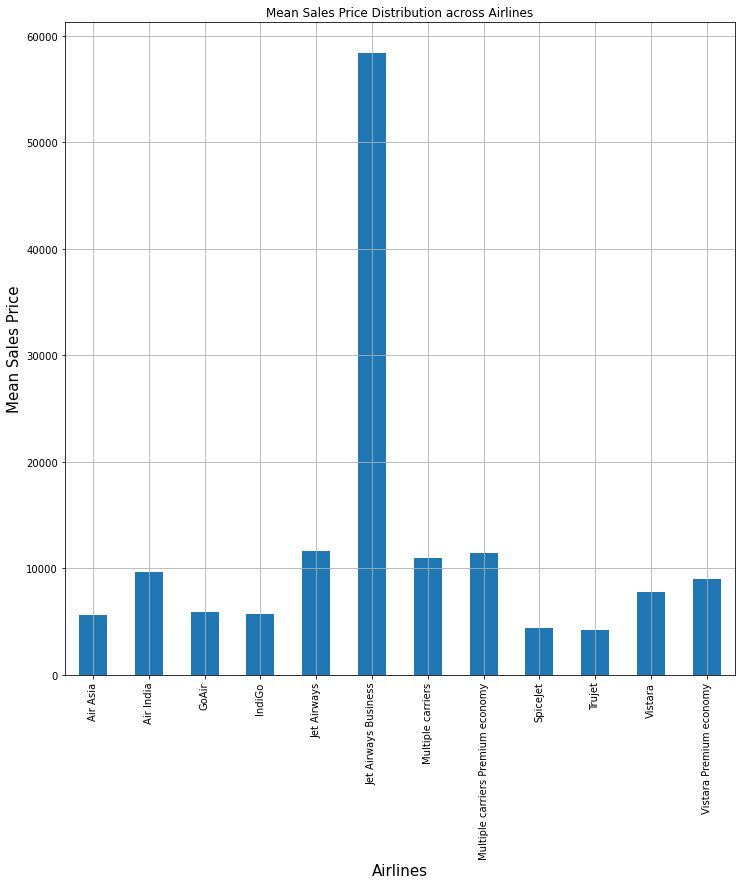

In [28]:
ax=data.groupby('Airline')['Price'].mean().plot(kind='bar',grid=True,figsize=(12,12))
ax.set_xlabel('Airlines',fontsize=15)
ax.set_ylabel('Mean Sales Price',fontsize=15)
plt.title('Mean Sales Price Distribution across Airlines')
plt.show()

# Price between source and destination

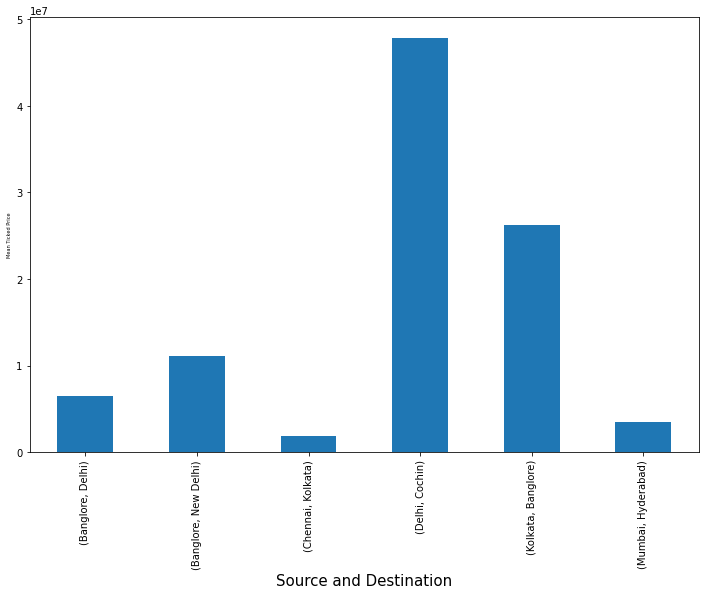

In [29]:
ax=data.groupby(['Source','Destination'])['Price'].sum().plot(kind='bar',figsize=(12,8))
ax.set_xlabel('Source and Destination',fontsize=15)
ax.set_ylabel('Mean Ticked Price',fontsize=5)
plt.show()


In [30]:
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}                                            

In [31]:
data['month']=data['month'].map(monthDict)

In [32]:
data.head()

Airline Date_of_Journey    Source Destination Duration Total_Stops  \
0       IndiGo      2019-03-24  Banglore   New Delhi   2h 50m    non-stop   
1    Air India      2019-01-05   Kolkata    Banglore   7h 25m     2 stops   
2  Jet Airways      2019-09-06     Delhi      Cochin      19h     2 stops   
3       IndiGo      2019-12-05   Kolkata    Banglore   5h 25m      1 stop   
4       IndiGo      2019-01-03  Banglore   New Delhi   4h 45m      1 stop   

   Price  day month  Day_name  
0   3897   24   Mar         7  
1   7662    5   Jan         6  
2  13882    6   Sep         5  
3   6218    5   Dec         4  
4  13302    3   Jan         4

# Plot showing Distribution of price across months and airlines

<AxesSubplot:xlabel='Airline'>

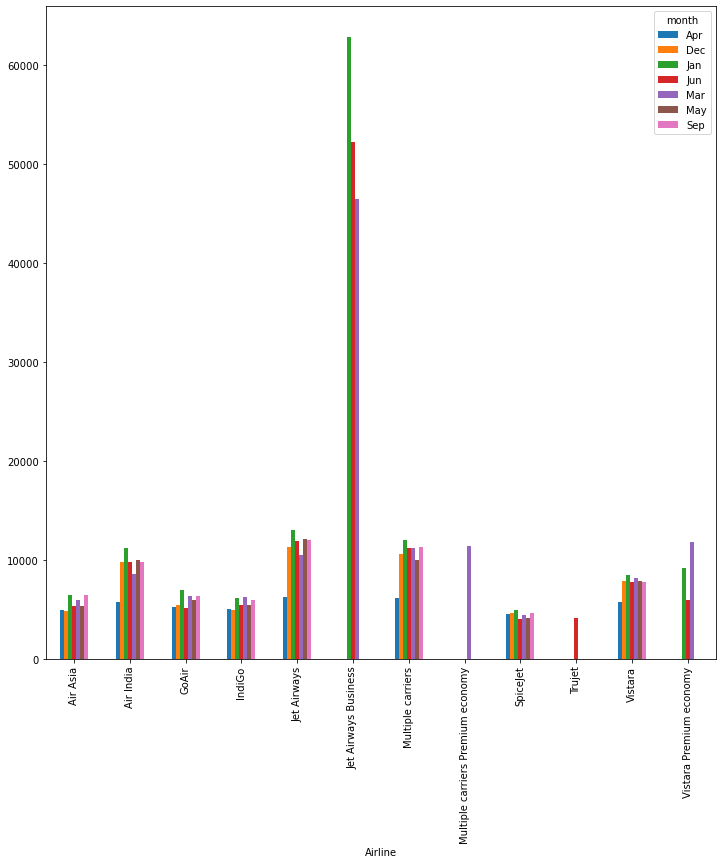

In [33]:
d1=data.groupby(['Airline','month'])['Price'].mean().unstack('month').plot(kind='bar',figsize=(12,12))
d1

<AxesSubplot:xlabel='Airline'>

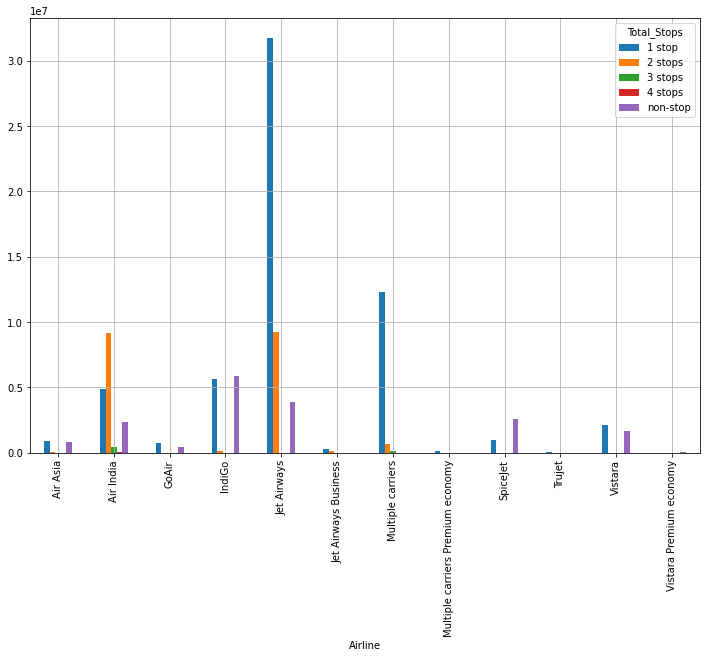

In [34]:
data.groupby(['Airline','Total_Stops'])['Price'].sum().unstack('Total_Stops').plot(kind='bar',grid=True,figsize=(12,8))

In [35]:
data.head()

Airline Date_of_Journey    Source Destination Duration Total_Stops  \
0       IndiGo      2019-03-24  Banglore   New Delhi   2h 50m    non-stop   
1    Air India      2019-01-05   Kolkata    Banglore   7h 25m     2 stops   
2  Jet Airways      2019-09-06     Delhi      Cochin      19h     2 stops   
3       IndiGo      2019-12-05   Kolkata    Banglore   5h 25m      1 stop   
4       IndiGo      2019-01-03  Banglore   New Delhi   4h 45m      1 stop   

   Price  day month  Day_name  
0   3897   24   Mar         7  
1   7662    5   Jan         6  
2  13882    6   Sep         5  
3   6218    5   Dec         4  
4  13302    3   Jan         4

In [36]:
data['Duration_in_minutes']=data['Duration'].str.replace('h','*60').str.replace('m','*1').str.replace(' ','+').apply(eval)

In [37]:
data.head()

Airline Date_of_Journey    Source Destination Duration Total_Stops  \
0       IndiGo      2019-03-24  Banglore   New Delhi   2h 50m    non-stop   
1    Air India      2019-01-05   Kolkata    Banglore   7h 25m     2 stops   
2  Jet Airways      2019-09-06     Delhi      Cochin      19h     2 stops   
3       IndiGo      2019-12-05   Kolkata    Banglore   5h 25m      1 stop   
4       IndiGo      2019-01-03  Banglore   New Delhi   4h 45m      1 stop   

   Price  day month  Day_name  Duration_in_minutes  
0   3897   24   Mar         7                  170  
1   7662    5   Jan         6                  445  
2  13882    6   Sep         5                 1140  
3   6218    5   Dec         4                  325  
4  13302    3   Jan         4                  285

In [38]:
data.drop(columns=['Date_of_Journey'],inplace=True)


In [39]:
data.drop(columns=['Duration'],inplace=True)

# mean Encoding the Categorical Variable

In [40]:
def MeanEncoding(data,col,target):
    mpp=data.groupby(col)[target].mean().to_dict()
    data[col]=data[col].map(mpp)
    return data

In [41]:
cat_feat=[i for i in data.columns if data[i].dtype=='O']

In [42]:
for i in cat_feat:
    data=MeanEncoding(data,i,'Price')

In [43]:
data.head()

Airline        Source   Destination   Total_Stops  Price  day  \
0   5673.682903   8017.464269  11917.716738   5024.900315   3897   24   
1   9611.210616   9158.389411   9158.389411  12715.807895   7662    5   
2  11643.923357  10539.439057  10539.439057  12715.807895  13882    6   
3   5673.682903   9158.389411   9158.389411  10594.123556   6218    5   
4   5673.682903   8017.464269  11917.716738  10594.123556  13302    3   

          month  Day_name  Duration_in_minutes  
0   8433.839891         7                  170  
1  10492.642791         6                  445  
2   9551.474395         5                 1140  
3   9110.774295         4                  325  
4  10492.642791         4                  285

In [44]:
data.dropna(inplace=True)

In [45]:
x=data.drop(columns=['Price'])
y=data['Price']

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
cont_feat=[i for i in x.columns if x[i].dtype!='O']

In [49]:
x[cont_feat]=scaler.fit_transform(x[cont_feat])

# Spliting

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [51]:
def Prediction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=np.sqrt(mean_squared_error(y_pred,y_test))
    score=r2_score(y_pred,y_test)
    return error,score
    

# Other Models

In [52]:
linear_error,linear_score=Prediction(LinearRegression(),x_train.dropna(),x_test,y_train,y_test)

In [53]:
linear_error

2818.989100878687

In [54]:
linear_score

0.36324840430377525

In [55]:
dt_error,st_score=Prediction(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

In [56]:
dt_error

2567.0816350398622

In [57]:
st_score

0.6576600570317253

In [58]:
rf_error,rf_score=Prediction(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [59]:
rf_error

2209.264597644377

In [60]:
rf_score

0.7193566015155513

In [61]:
gb_error,gb_score=Prediction(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

In [62]:
gb_error

2154.6557065090387

In [63]:
gb_score

0.6876049354243956

In [64]:
ad_error,ad_score=Prediction(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

In [65]:
ad_error

2909.4142235339505

In [66]:
ad_score

0.28980166984478384

In [67]:
xg_error,xg_score=Prediction(xgb.XGBRegressor(),x_train,x_test,y_train,y_test)

In [68]:
xg_score

0.7662134193165454

In [69]:
result=pd.DataFrame({'Models':['Linearregression','RandomForestRegressor','GradientBoostingRegressor',
                              'AdaBoostRegressor','XgboostRegressor'],'Errors':[linear_error,rf_error,gb_error,ad_error,xg_error],
                    'R2_Score':[linear_score,rf_score,gb_score,ad_score,xg_score]})

# Result

In [70]:
result

Models       Errors  R2_Score
0           Linearregression  2818.989101  0.363248
1      RandomForestRegressor  2209.264598  0.719357
2  GradientBoostingRegressor  2154.655707  0.687605
3          AdaBoostRegressor  2909.414224  0.289802
4           XgboostRegressor  2001.302340  0.766213

# Hyper Parameter Tuning Xgboost Regressor

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param={'max_depth':range(5,10,2),'min_child_weight':range(1,6,2)}

In [73]:
grid=GridSearchCV(xgb.XGBRegressor(),param_grid=param)

In [74]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [75]:
grid.best_score_

0.7924015843426255

In [76]:
grid.best_params_

{'max_depth': 5, 'min_child_weight': 1}

In [77]:
param={'gamma':[i/10 for i in range(1,5)]}

In [78]:
grid=GridSearchCV(xgb.XGBRegressor(max_depth=5,min_child_weight=1),param_grid=param,cv=5,scoring='r2')

In [79]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters

In [80]:
import sklearn

In [81]:
grid.best_score_

0.7924015843426255

In [82]:
grid.best_params_

{'gamma': 0.1}

In [83]:
param={
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [84]:
grid=GridSearchCV(xgb.XGBRegressor(learning_rate=0.1,n_estimators=140,gamma=0.1,max_depth=5),cv=5,scoring='r2',param_grid=param)

In [85]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=0.1,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=140, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameter

In [86]:
grid.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.8}

In [87]:
grid.best_score_

0.8009977947087839

In [88]:
param={
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [89]:
grid=GridSearchCV(xgb.XGBRegressor(learning_rate=0.1,n_estimators=140,gamma=0.1,max_depth=5,colsample_bytree= 0.7, subsample=0.8),cv=5,scoring='r2',
                  param_grid=param)

In [90]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.7,
                                    gamma=0.1, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=140, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=0.8,
                                    tree_method=None, validate_parameters=

In [91]:
grid.best_params_

{'reg_alpha': 100}

# Final R2 Score

In [92]:
grid.best_score_

0.8017883818338782